<a href="https://colab.research.google.com/github/Bavitayadav8/Bavitayadav8/blob/main/Copy_of_assignment%2C10_%2CKNN_tain_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.spatial.distance import euclidean,cityblock
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_table('trainKNN.txt',delimiter=',',names=['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass'])
test_data = pd.read_table('testKNN.txt',delimiter=',',names=['Ri','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type_of_glass'])
train_data

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
207,1.51645,14.94,0.00,1.87,73.11,0.00,8.67,1.38,0.0,7
208,1.51831,14.39,0.00,1.82,72.86,1.41,6.47,2.88,0.0,7
209,1.51640,14.37,0.00,2.74,72.85,0.00,9.45,0.54,0.0,7
210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7


In [ ]:
test_data

,Ri,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_of_glass
68,1.52152,13.05,3.65,0.87,72.32,0.19,9.85,0.00,0.17,1
69,1.52152,13.12,3.58,0.90,72.20,0.23,9.82,0.00,0.16,1
70,1.52300,13.31,3.58,0.82,71.99,0.12,10.17,0.00,0.03,1
144,1.51709,13.00,3.47,1.79,72.72,0.66,8.18,0.00,0.00,2
145,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.00,0.24,2
146,1.51839,12.85,3.67,1.24,72.57,0.62,8.68,0.00,0.35,2
161,1.51832,13.33,3.34,1.54,72.14,0.56,8.99,0.00,0.00,3
162,1.51934,13.64,3.54,0.75,72.65,0.16,8.89,0.15,0.24,3
163,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.00,0.37,3
174,1.52043,13.38,0.00,1.40,72.25,0.33,12.50,0.00,0.00,5


In [ ]:
print(train_data.info())
print("\n\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 211
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ri             196 non-null    float64
 1   Na             196 non-null    float64
 2   Mg             196 non-null    float64
 3   Al             196 non-null    float64
 4   Si             196 non-null    float64
 5   K              196 non-null    float64
 6   Ca             196 non-null    float64
 7   Ba             196 non-null    float64
 8   Fe             196 non-null    float64
 9   Type_of_glass  196 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB
None



<class 'pandas.core.frame.DataFrame'>
Int64Index: 18 entries, 68 to 214
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ri             18 non-null     float64
 1   Na             18 non-null     float64
 2   Mg             18 non-

In [ ]:
print(train_data['Type_of_glass'].value_counts())
print("\n\n")
print(test_data['Type_of_glass'].value_counts())

2    73
1    67
7    26
3    14
5    10
6     6
Name: Type_of_glass, dtype: int64



1    3
2    3
3    3
5    3
6    3
7    3
Name: Type_of_glass, dtype: int64


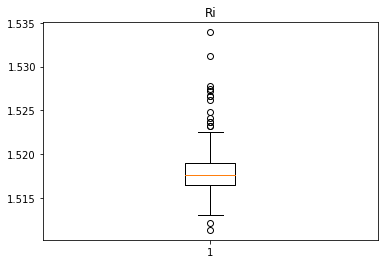

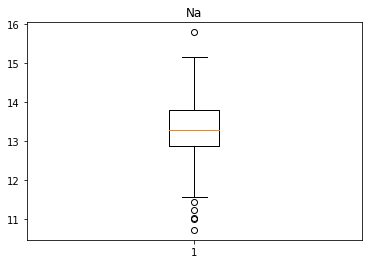

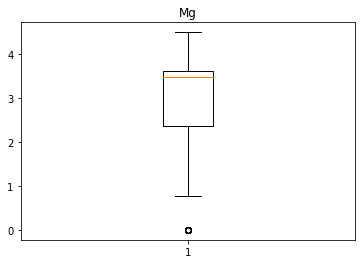

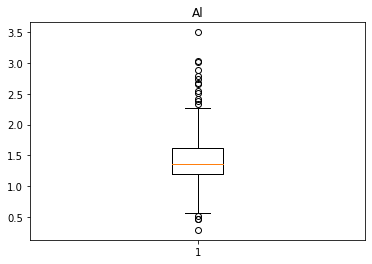

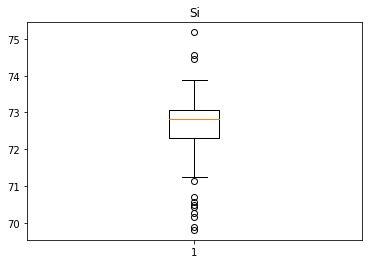

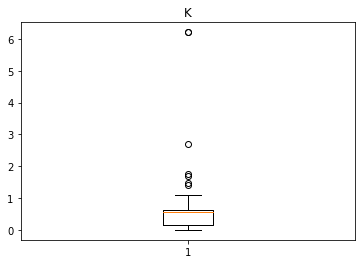

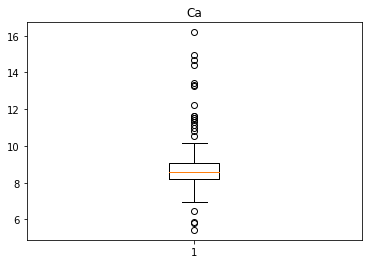

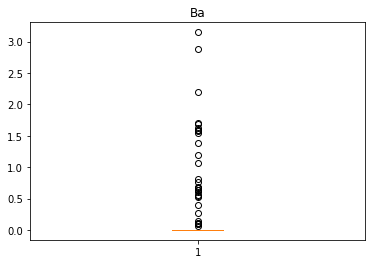

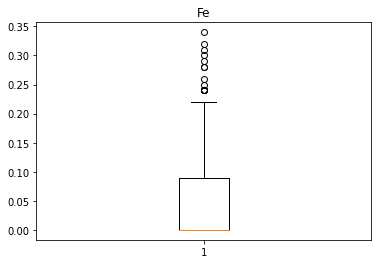

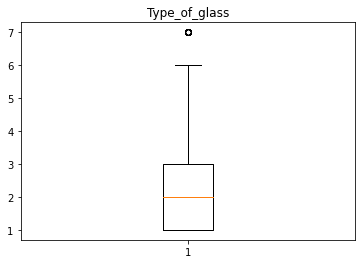

In [ ]:
for i in train_data.columns:
  plt.boxplot(train_data[i])
  plt.title(i)
  plt.show()  


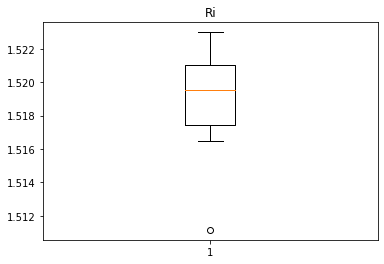

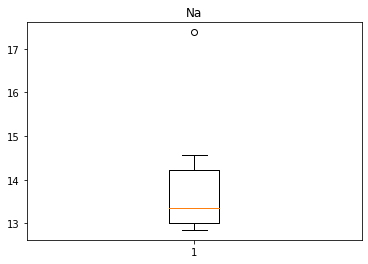

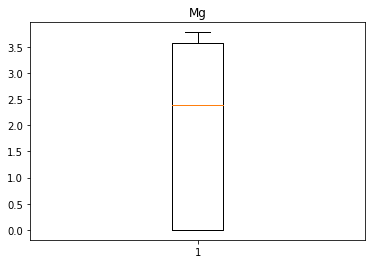

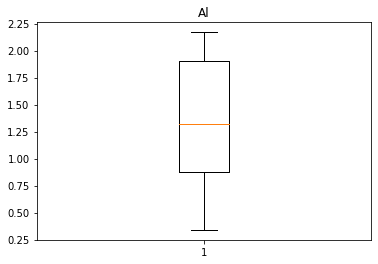

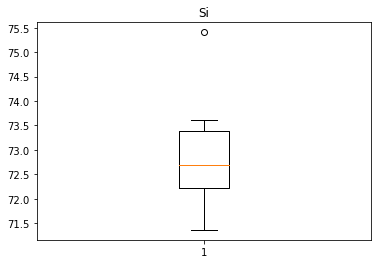

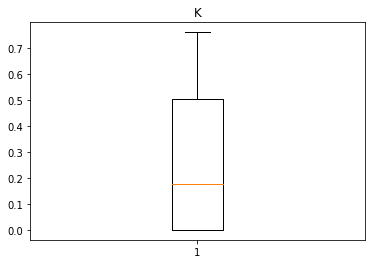

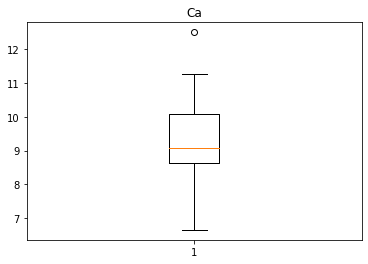

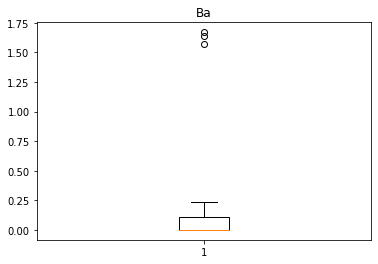

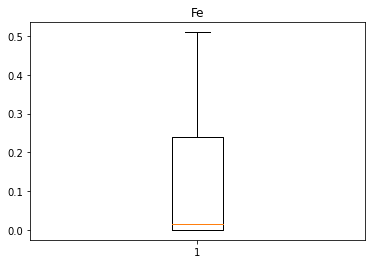

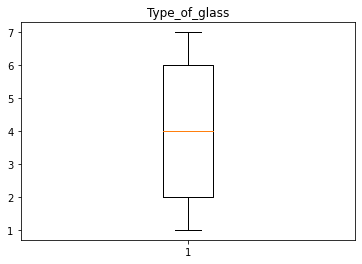

In [ ]:
for i in test_data.columns:
  plt.boxplot(test_data[i])
  plt.title(i)
  plt.show()

In [ ]:
x_train = train_data.iloc[:,[0,1,2,3,4,5,6,7,8]]
y_train = train_data.iloc[:,9]
x_test = test_data.iloc[:,[0,1,2,3,4,5,6,7,8]]
y_test = test_data.iloc[:,9]
ss = StandardScaler()
ss.fit(x_train)
ssx_train = ss.transform(x_train)
ssx_test = ss.transform(x_test)

In [ ]:
List_of_accuracy = []
for i in range(1,11):    
    Euclidean_Distance = KNeighborsClassifier(n_neighbors=i,metric = euclidean)
    Euclidean_Distance.fit(ssx_train,y_train)
    E_pred = Euclidean_Distance.predict(ssx_test)
    List_of_accuracy.append(accuracy_score(y_test,E_pred))
print(List_of_accuracy)
print("\n\n")
print(f"The Maximum accuracy  for euclidean was {max(List_of_accuracy)}")

[0.6111111111111112, 0.4444444444444444, 0.6111111111111112, 0.5, 0.5555555555555556, 0.5555555555555556, 0.5555555555555556, 0.6111111111111112, 0.5555555555555556, 0.5]



The Maximum accuracy  for euclidean was 0.6111111111111112


In [ ]:
List_of_accuracy = []
for i in range(1,11):    
    Manhattan_Distance = KNeighborsClassifier(n_neighbors=i,metric = cityblock)
    Manhattan_Distance.fit(ssx_train,y_train)
    M_pred = Manhattan_Distance.predict(ssx_test)
    List_of_accuracy.append(accuracy_score(y_test,M_pred))
print(List_of_accuracy)
print("\n")
print(f"The Maximum accuracy for Manhattan was  {max(List_of_accuracy)}")

[0.6666666666666666, 0.4444444444444444, 0.6111111111111112, 0.5, 0.5555555555555556, 0.5, 0.5, 0.5, 0.5, 0.5]


The Maximum accuracy for Manhattan was  0.6666666666666666


In [ ]:
print(y_test)

68     1
69     1
70     1
144    2
145    2
146    2
161    3
162    3
163    3
174    5
175    5
176    5
183    6
184    6
185    6
212    7
213    7
214    7
Name: Type_of_glass, dtype: int64


 **Euclidean_Distance**

In [ ]:
print(E_pred)

[1 1 1 2 1 1 2 2 2 2 2 2 6 6 7 7 7 7]


  Manhattan_Distance

In [ ]:
print(M_pred)

[1 1 1 2 1 2 1 2 1 2 2 2 6 2 7 7 7 7]
